In [4]:
import pandas as pd

# Load the uploaded file to inspect its structure
file_path = "sample_submission (2).csv"
csv_file = pd.read_csv(file_path)
csv_file

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        96
           1       0.52      0.51      0.52       104

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.51      0.51      0.51       200

Accuracy Score:
0.505


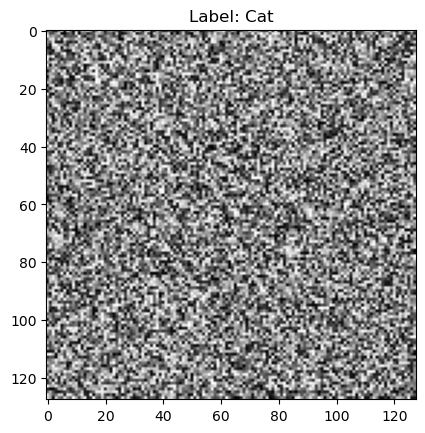

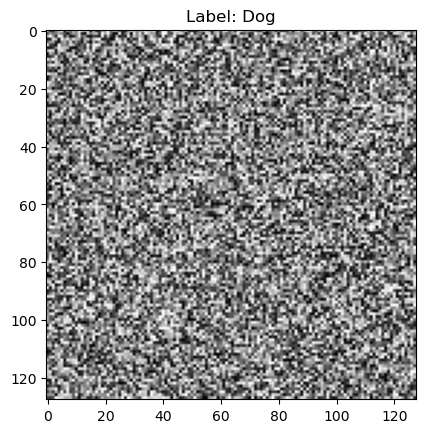

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import hog
import matplotlib.pyplot as plt

# Simulate random images (grayscale 128x128 pixels) for 500 cats and 500 dogs
num_samples = 1000
image_size = (128, 128)
categories = ['Cat', 'Dog']
labels = np.array([0] * 500 + [1] * 500)  # 0 for Cat, 1 for Dog

# Create random noise images
image_data = np.random.rand(num_samples, *image_size)

# Extract HOG features from the simulated images
hog_features_list = []
for img in image_data:
    # Extract HOG features from the synthetic images
    hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2-Hys')
    hog_features_list.append(hog_features)

# Convert the list of features to a numpy array
hog_features = np.array(hog_features_list)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Optional: Visualize some sample images (before HOG feature extraction)
def visualize_random_image(image_data, labels, idx):
    plt.imshow(image_data[idx], cmap='gray')
    plt.title(f"Label: {categories[labels[idx]]}")
    plt.show()

# Visualize random samples from the synthetic data
for idx in [0, 500]:  # One from each class
    visualize_random_image(image_data, labels, idx)